In [71]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pylab import *

In [81]:
# Create a reference to the CSVs and import into Pandas DataFrames

ride_csv = os.path.join("raw_data/", "ride_data.csv")
city_csv = os.path.join("raw_data/", "city_data.csv")

ride_df = pd.read_csv(ride_csv, low_memory=False)
city_df = pd.read_csv(city_csv, low_memory=False)

In [73]:
# Create variables and perform per-city calculations

ride_count_by_city = ride_df.groupby("city").count()["fare"]

avg_fare_by_city = ride_df.groupby("city").mean()["fare"]

total_fare_by_city = ride_df.groupby("city").sum()["fare"]

In [74]:
# Create dataframe

summary_df = pd.DataFrame({"Ride Count": ride_count_by_city,
                           "Average Fare": avg_fare_by_city,
                          "Total Fares": total_fare_by_city})

In [75]:
# Inner merge new per-city summary_df and city_df (from CSV)

merged_df = pd.merge(summary_df, city_df, right_on="city", left_index=True)

# Set row index to "city"
merged_df = merged_df.reset_index(drop=True)
merged_df = merged_df.set_index("city")

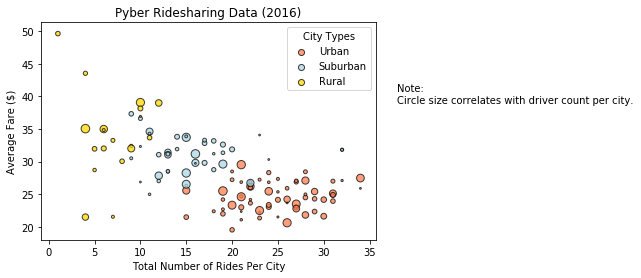

In [76]:
# Create overlaid scatterplots by city type of total rides vs. avg fare
# Determine bubble size by number of drivers per city

urban = plt.scatter(merged_df.groupby(['type']).get_group('Urban')["Ride Count"], 
            merged_df.groupby(['type']).get_group('Urban')["Average Fare"], 
            facecolors='coral', edgecolors="black", s= merged_df["driver_count"], alpha=0.75, label="Urban")

suburban = plt.scatter(merged_df.groupby(['type']).get_group('Suburban')["Ride Count"], 
            merged_df.groupby(['type']).get_group('Suburban')["Average Fare"], 
            facecolors='lightblue', edgecolors="black", s= merged_df["driver_count"], alpha=0.75, label = "Suburban")

rural = plt.scatter(merged_df.groupby(['type']).get_group('Rural')["Ride Count"], 
            merged_df.groupby(['type']).get_group('Rural')["Average Fare"], 
            facecolors='gold', edgecolors="black", s= merged_df["driver_count"], alpha=0.75, label = "Rural")

# Set textual properties
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")

# Configure legend with City Types and add note to chart

plt.legend(loc="upper right")
plt.legend(handles=[urban, suburban, rural], loc="best", title="City Types")
figtext(.95, .6, "Note:\nCircle size correlates with driver count per city.", rotation='horizontal')

plt.show()

In [77]:
# Create lists for pie chart configurations

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.08)

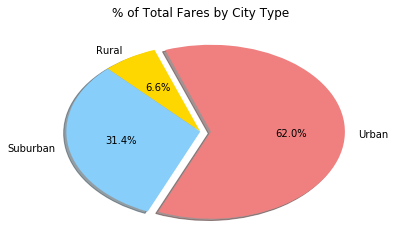

In [78]:
# Create pie chart

plt.title("% of Total Fares by City Type")
plt.pie(merged_df.groupby("type").sum()["Total Fares"], explode = explode, labels = labels,
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=110)
plt.show()

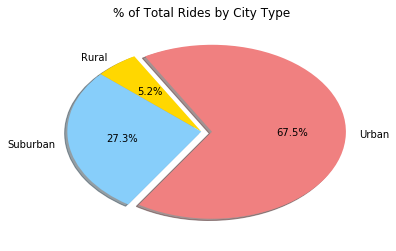

In [79]:
# Create pie chart

plt.title("% of Total Rides by City Type")
plt.pie(merged_df.groupby("type").sum()["Ride Count"], explode = explode, labels = labels,
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.show()

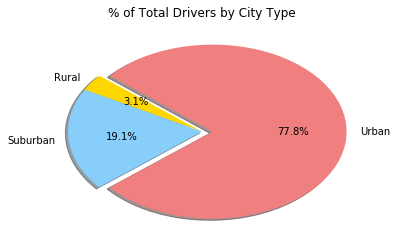

In [80]:
# Create pie chart

plt.title("% of Total Drivers by City Type")
plt.pie(merged_df.groupby("type").sum()["driver_count"], explode = explode, labels = labels,
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()